<a href="https://www.kaggle.com/code/luochenxun/learn-1?scriptVersionId=123917782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 这是我的第一个线性回归实验

## 第一阶段：数据的收集与预处理

### 1. 先收集数据，建立数据源
### 2. 然后导入数据，进行可视化分析
这里用 pandas 将 csv 数据读入，转成 dataframe 结构。`df.head()` 打印表结构。

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df_ads = pd.read_csv('/kaggle/input/learn-ads-amount/advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


### 3. 数据的相关性分析(correlation analysis)

相关分析后我们 可以通过相关性系数了解数据集中任意一对变量（a，b）之间的相关性。

`相关性系数`是一个-1～1的值，正值表示正相关，负值表示负相 关。数值越大，相关性越强。
> - 如果a和b的相关性系数是1，则a和b总是相等的。
> - 如果a和b的相关性系数是0.9，则b会显著地随着a的变化而变化，而且变化的趋势保持一致。
> - 如果a和b的相关性系数是0.3，则说明两者之间并没有什么明显的联系。

这里使用的 `Seaborn` 是统计学可视化工具库，这里使用其热力图功能`sns.heatmap`，展示数据的相关性`df_ads.corr()`，可对所有特征和标签两两显示其相关性（用热力图表示）。
`matplotlib`是可视化图形库，具体的图形展示要使用此库 `plt.show()` 展示。

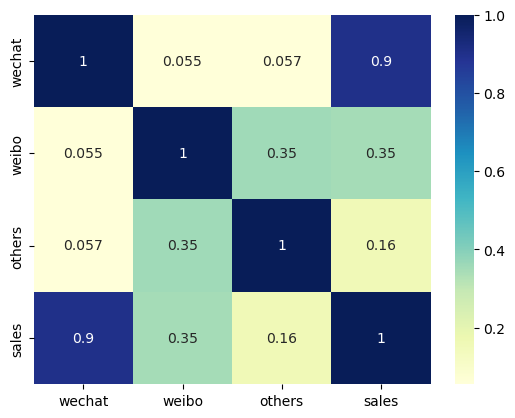

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns   # Seaborn – 统计学数据可视化工具库
# 对所有的标签和特征两两显示其相关性的热力图(heatmap)
sns.heatmap(df_ads.corr(), cmap='YlGnBu', annot=True)
plt.show()

在上面的实例中，我们主要看最后一行，微信、微博和others的广告投入与 sales 销售额的相关性。可以看出，微信与之相关性是 0.9，是很高的；而微博与之相关性才 0.35，说明微博广告投入的收入效果不明显。

### 4. 数据的散点图分析

相关性可以看自变量与因变量之间是否相关，相关度怎样。而散点图可以看两个变量间相关的趋势是如何。
使用 `sns.pairplot()`方法，指定对比的 x 轴自变量(特征)，与 y 轴因变量(标签)。

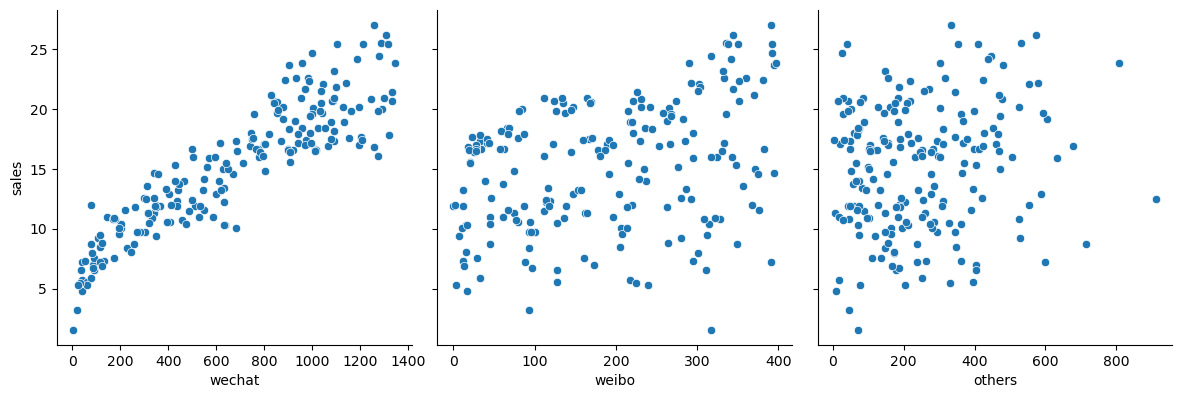

In [3]:
# 显示销量和各种广告投放量的散点图
sns.pairplot(df_ads, 
             x_vars = ['wechat', 'weibo', 'others'],
             y_vars = 'sales',
             height =4, aspect=1, kind='scatter')
plt.show()

从上面例子可看出，微信金额投入超大，收入越可观。而其它两项很难看出趋势。

### 5. 数据集的清洗与规范化

在对数据有大致分析与印象后，就要开始精细化分析了，这之前先要对数据进行清洗与规范化。

- **清洗**：将不必要的数据清洗出去；将不符要求的数据转成符合要求的标准数据；
- **规范化**：将数据格式化成系统可直接处理的数据结构；

对于回归问题的数值类型数据集，机器学习模型 所读入的规范格式应该是2D张量，也就是矩阵，其形状为`(样本数，标签数）`。其中的**行是数据，而其中的列是特征**。

所以此例中，我们要将1D张量(向量)的特征值（微信广告投入费用）转成2D张量（也就是一个矩阵，只不过此矩阵只有一列，就是“微信广告投入费”，每一行是一维数据）。对于`标签`--销售额来说，也是一样的，要进行一个1D->2D的转换。这里使用了 `numpy.reshape()`方法。

In [4]:
### --- 清洗
# 构建特征集，只含有微信广告一个特征
X = np.array(df_ads.wechat)
# 构建标签集
y = np.array(df_ads.sales)

# x.ndim = 1，因为它是一个向量（1d张量）
print("张量X的阶：", X.ndim)
# shape 打印：(200,)， 表示这是一个 1D 200 维向量(shape 打印的是每一阶的维度)
print("张量X的形状：", X.shape)
print("张量X的内容：", X[:10])

### --- 规范化
# 通过reshape函数把向量转换为矩阵，len函数返回样本个数
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

# 其 shape 变成了 2D 张量 (200, 1)，
print("规范化后，张量X的形状：", X.shape)
print("规范化后，张量X的内容：", X[:10])

张量X的阶： 1
张量X的形状： (200,)
张量X的内容： [ 304.4 1011.9 1091.1   85.5 1047.   940.9 1277.2   38.2  342.6  347.6]
规范化后，张量X的形状： (200, 1)
规范化后，张量X的内容： [[ 304.4]
 [1011.9]
 [1091.1]
 [  85.5]
 [1047. ]
 [ 940.9]
 [1277.2]
 [  38.2]
 [ 342.6]
 [ 347.6]]


In [5]:
### 6. 拆分数据集为训练集和测试集